### Financial Analysis for Value Creation and Decision Making Project

#### Submitted By: Team Golden Sales
Pyros Orfeas Bollano,
Migle Kasetaite,
Afshan Anam Saeed,
Paloma Bootello Campos,
Victor Preito Gill

<b> Project Abstract </b>

Our current project is based on the sales and finances of an Electric Car making company named "Tesla". Tesla is an Electric Vehicle and clean energy supplier company, that is based in the United States. It manufactures cars, batteries, solar panels, etc., and is emerging to become one of the most valuable countries in the world. Founded in 2003, it produced its first car in the year 2009, and was IPO listed in 2010. It launched itself in the Electric Car domain in the year 2012, and has dominated the electric car space with its modern EV and driver assistant technology. Currently, its presence is seen in most of the developed first world countries, including USA, Canada, China and Europe.

As employees under the CFO of Tesla, we intend on advising the management regarding its expenditures and future sales. From its historic sales, budget and accounting information, we attempt to create a time series model to predict the sales of Tesla in various continents. Additionally, we attempted a production model to cater to the production capacity of Tesla and another model to predict the required Capital Expenditures to meet the sales, keeping a certain goal in mind. Climate change information, which was taken from NASA database, has also been added to the data to help advice the marketing team for associating climate change and the need for renewable energy to meet its marketing goals.

<b> Data Extraction </b>

Our data contains an array of information that we felt were useful for carrying prediction models for Tesla. Since Tesla is a publically listed company, the accounts information, including the sales information, were obtained from its website, starting from a period of 2011. These sales have been segregarted country wise. Certain worldwide car sales information was also taken from data websites to understand the growth in the worldwide market share of Tesla. The factory information was taken from Wikipedia, and the share price information, along with its increasing volume sold were taken from an API named yfinance. Additionally, public data websites helped in providing us with the climate change information, GDP of countries and crude Oil prices. Certain type of information that we felt was important, like the Public belief in climate change, policies linked to EV in countries, import duties on cars within countries, standard fuel prices country wise, etc. could, unfortunately, not be found on the internet.  

In [ ]:
#importing the data set
import pandas as pd
df=pd.read_csv("/content/DATA SPREADSHEET - DATA SHEET.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 46 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Date                                                    344 non-null    object 
 1   Year/Quarter                                            344 non-null    object 
 2   Year                                                    344 non-null    int64  
 3   Quarter                                                 344 non-null    int64  
 4   Country                                                 344 non-null    object 
 5   Continent                                               344 non-null    object 
 6   Carbon Dioxide / Yearly Average (ppm)                   344 non-null    float64
 7   Arctic Sea Ice Extent / million square km               344 non-null    float64
 8   Temperature Anomaly (C)                 

<b> Data Cleaning </b>

Our data contains certain missing information. Our first step, therefore, is to remove the columns that have more than 20% null values. Our next step would be to replace the null values in the remaining columns with their most suitable values. For this purpose we have used the iterative imputer method provided in the sklearn library of Python. 

In [ ]:
#importing the necessary libraries for imputing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer

In [ ]:
#dropping the unnecessary columns
df.drop(columns=["Unnamed: 42","Unnamed: 43",
                 "Import Duties applicable or not (True/ False)",
                 "If import Duties- its value (%)","Net income (GAAP)",
                 "Average value of vehicles delivered","Average Fuel price per liter (in $)",
                 "Public Belief in the Climate Emergency (%)","Antarctic mass / Gigatonnes"],inplace=True)

Iterative Imputer estimates the missing values in the feature from all the other values present in our dataset. This means it also depends upon other features. Since most of the information in our dataset is related to Tesla, in order to impute values like the GDP and the crude oil prices, we need to make another dataframe containing only certain those features that we think might be relevant for them. For the missing values within Tesla features, most of the features will be used to carry out simple imputation.

One thing to note for this type of imputation is that all the features need to be of the type float, and thus, converting data types of features, and dummification of categorical variables has also been carried out within. 

In [ ]:
#imputing the GDP Values
selected_columns = df[["Year","Quarter","Country","Continent","GDP per capita, PPP (constant 2017 international $)"]]
df_interpol=selected_columns.copy()
df_interpol=pd.get_dummies(df_interpol,columns=["Country","Continent"])
columns = df_interpol.columns
df_interpol = IterativeImputer(random_state=0, verbose=2).fit_transform(df_interpol)
df_interpol = pd.DataFrame(df_interpol, columns=columns)
df["GDP per capita, PPP (constant 2017 international $)"]=df_interpol["GDP per capita, PPP (constant 2017 international $)"]

#imputing the Crude Oil Price Values
selected_columns = df[["Year","Quarter","Country","Continent","Crude oil import price per barrel ($ USD)"]]
df_interpol=selected_columns.copy()
df_interpol=pd.get_dummies(df_interpol,columns=["Country","Continent"])
columns = df_interpol.columns
df_interpol = IterativeImputer(random_state=0, verbose=2).fit_transform(df_interpol)
df_interpol = pd.DataFrame(df_interpol, columns=columns)
df["Crude oil import price per barrel ($ USD)"]=df_interpol["Crude oil import price per barrel ($ USD)"]

#imputing the remaining columns- making sure all values of the type float
df.drop(columns=["Date","Year/Quarter","Year","Quarter"],inplace=True)
df["Tesla Market share of country sales to continent"].astype(float)
df["Tesla Market share of total global sales"].astype(float)
df = pd.get_dummies(df,columns=["Country","Continent","Presence of a Production Unit (Y/N)"])
columns = df.columns
df = IterativeImputer(random_state=0, verbose=2).fit_transform(df)

df = pd.DataFrame(df, columns=columns)
df_refined=df.copy()
df_new=pd.read_csv("/content/DATA SPREADSHEET - DATA SHEET.csv")
df_new["Date"]=pd.to_datetime(df_new["Date"])
df_grouped=df.insert(0,"Date",df_new["Date"])
df_grouped=df.insert(1,"Year/Quarter",df_new["Year/Quarter"])

[IterativeImputer] Completing matrix with shape (344, 14)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.03
[IterativeImputer] Change: 34238.28343650212, scaled tolerance: 70.92032472999999 
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.05
[IterativeImputer] Change: 0.0, scaled tolerance: 70.92032472999999 
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix with shape (344, 14)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.02
[IterativeImputer] Change: 47.26782404044975, scaled tolerance: 2.021 
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.04
[IterativeImputer] Change: 0.0, scaled tolerance: 2.021 
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix with shape (344, 43)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.33
[IterativeImputer] Change: 3198708.649858648, scaled tolerance: 105000.0 
[IterativeImputer] Ending imput

<b> Exploratory Data Analysis </b>

In this part, we are going to view our dataset and understand the meaning behind our values. The analysis has also been conducted in the Power BI dashboard attached with the file. We will use the library Seaborn in Python for visualizing our data.

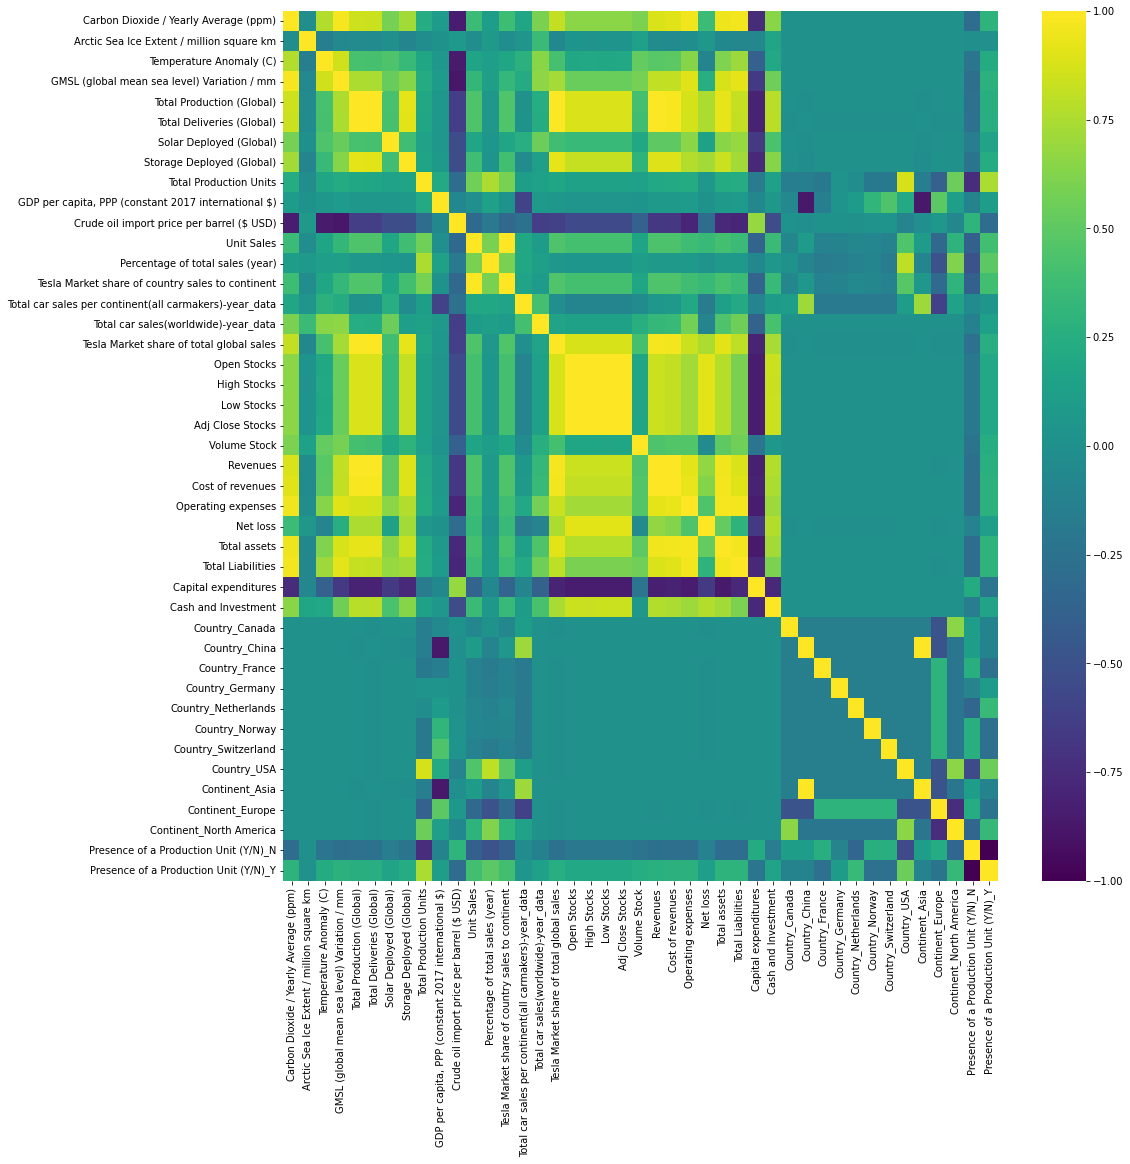

In [ ]:
# finding the correlation of all features
fig = plt.figure(figsize= (16,16))
import seaborn as sns
sns.heatmap(df.corr(), annot=False, vmax=1, cmap='viridis', square=False)

<b> Observations: EDA </b>

From the correlation matrix above we can see that:
1. Unit Sales are highly correlated with Cash and Investment, Total Liabilities and Assets, Net Loss, Operating Expenses, Revenues, Total Production and Stocks factors. This means that Unit Sales increase impacts the increase in other Tesla financial components. It also shows good correlation with the countries.
2. Most of the revenues and financial information look correlated with the investments Tesla has made over time, for example in Production Units, Solar deployed, etc. One can be a causation of the other.
3. Capital expenditure values (which are negative in our data set) also shows high correlation to most of the factors.
4. GDP and Crude Oil prices do not show very well correlation with the Unit Sales of Tesla. However, it shows correlation with the cars sold worldwide from all automakers. 
5. Climate change information does not show very significant correlation with the sales of Tesla. However, the share prices of Tesla are very much dependent upon these factors, signifying a good approach towards Tesla's marketing strategy of associating them with sales of Green goods.

<b> Data Modelling </b>

In this section, we will start carrying out modelling of the dataset. Three types of models will be placed in front of you, one involving the time series analysis and sales prediction modelling, the other associated with the production modelling, and the third that helps predict the capital expenditures for the company. 

<b> A) Worldwide Sales Prediction- Time Series Modelling </b>

In order to carry out predictions for the worldwide Unit sales, we will be using Deep Learning Libraries like Keras for doing the predictions. 

In [ ]:
#importing the necessary libraries
import keras
from keras.layers import Dense
from keras.models import Sequential
#from keras.optimizers import Adam 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.layers import LSTM
from keras import metrics

from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [ ]:
#selecting the necessary columns
df_sales=df[["Year/Quarter","Unit Sales"]]

#grouping the data by Quarter
df_sales=df_sales.groupby("Year/Quarter").sum()
df_sales.reset_index(inplace=True)
df_sales.head()

,Year/Quarter,Unit Sales
0,2011/Q1,0.0
1,2011/Q2,0.0
2,2011/Q3,0.0
3,2011/Q4,0.0
4,2012/Q1,0.0


Our current approach is to understand the stationarity of the sales data to model it further. Thus we will be taking the difference in the sales from the previous quarter to understand the trends.

In [ ]:
#create a new dataframe to model the difference
df_diffsales = df_sales.copy()
#add previous sales to the next row
df_diffsales['prev_sales'] = df_diffsales['Unit Sales'].shift(1)
df_diffsales['diff'] = (df_diffsales['Unit Sales'] - df_diffsales['prev_sales'])
df_diffsales.head(10)

,Year/Quarter,Unit Sales,prev_sales,diff
0,2011/Q1,0.0,NaN,NaN
1,2011/Q2,0.0,0.0,0.0
2,2011/Q3,0.0,0.0,0.0
3,2011/Q4,0.0,0.0,0.0
4,2012/Q1,0.0,0.0,0.0
5,2012/Q2,0.0,0.0,0.0
6,2012/Q3,250.0,0.0,250.0
7,2012/Q4,2400.0,250.0,2150.0
8,2013/Q1,4818.0,2400.0,2418.0
9,2013/Q2,5068.0,4818.0,250.0


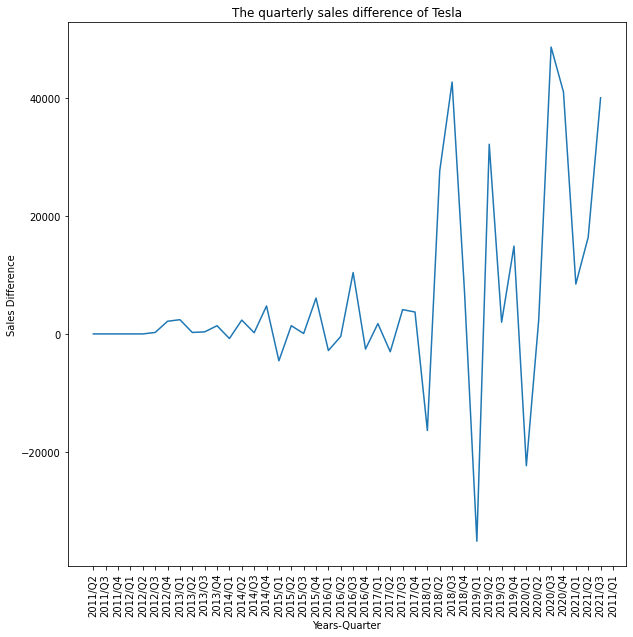

In [ ]:
#removing the first row
df_diffsales=df_diffsales.iloc[1:,:]

plt.figure(figsize=(10,10))
plt.plot(df_diffsales["Year/Quarter"],df_diffsales["diff"])
plt.xlabel("Years-Quarter")
plt.ylabel("Sales Difference")
plt.title("The quarterly sales difference of Tesla")
plt.xticks(df_sales["Year/Quarter"], rotation='vertical')
plt.show()

Looking deeply at this plot, we noticed that there did exist a stationarity in the Unit Sales of Tesla between 2014 to 2017. However, post 2017, the deviations became extreme, and moving forward it changes drastically. Since this is the best we could obtain, we will go ahead using these values.

In [ ]:
#create dataframe for transformation from time series to supervised
df_supervised = df_diffsales.drop(['prev_sales'],axis=1)
#adding lags
for inc in range(1,13):
    field_name = 'lag_' + str(inc)
    df_supervised[field_name] = df_supervised['diff'].shift(inc)
#drop null values
df_supervised = df_supervised.dropna().reset_index(drop=True)

In [ ]:
# Import statsmodels.formula.api
import statsmodels.formula.api as smf
# Define the regression formula
model = smf.ols(formula='diff ~ lag_1', data=df_supervised)
# Fit the regression
model_fit = model.fit()
# Extract the adjusted r-squared
regression_adj_rsq = model_fit.rsquared_adj
print(regression_adj_rsq)

-0.024925622654521362


Here we notice a very bad model score. Thus we cannot train the model on only one difference value. Thus, we will be considering other differences over time.

In [ ]:
# Define the regression formula
model = smf.ols(formula='diff ~ lag_1+lag_2+lag_3+lag_4+lag_5+lag_6+lag_7+lag_8+lag_9+lag_10+lag_11+lag_12', data=df_supervised)
# Fit the regression
model_fit = model.fit()
# Extract the adjusted r-squared
regression_adj_rsq = model_fit.rsquared_adj
print(regression_adj_rsq)

0.4989418065220983


Here, we have the most decent score we could obtain for the modelling.

In [ ]:
#import MinMaxScaler and create a new dataframe for LSTM model
from sklearn.preprocessing import MinMaxScaler
df_model = df_supervised.drop(['Unit Sales','Year/Quarter'],axis=1)
#split train and test set
train_set, test_set = df_model[0:-6].values, df_model[-6:].values   #taken 20% of our dataset as the test dataset

In [ ]:
#apply Min Max Scaler
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(train_set)
# reshape training set
train_set = train_set.reshape(train_set.shape[0], train_set.shape[1])
train_set_scaled = scaler.transform(train_set)
# reshape test set
test_set = test_set.reshape(test_set.shape[0], test_set.shape[1])
test_set_scaled = scaler.transform(test_set)

In [ ]:
X_train, y_train = train_set_scaled[:, 1:], train_set_scaled[:, 0:1]
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test, y_test = test_set_scaled[:, 1:], test_set_scaled[:, 0:1]
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
#deep learning models
model = Sequential()
model.add(LSTM(4, batch_input_shape=(1, X_train.shape[1], X_train.shape[2]), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam',metrics=[metrics.mean_squared_error, 
                                                                   metrics.mean_absolute_error, 
                                                                   metrics.mean_absolute_percentage_error,
                                                                   metrics.categorical_accuracy])

history=model.fit(X_train, y_train,epochs=100, batch_size=1, shuffle=False)

(loss, accuracy, f1_score, precision, recall) = model.evaluate(X_test, y_test, verbose=1)
print("Loss=",loss,"\n","Accuracy=", accuracy,"\n","f1_score=", f1_score,"\n","Precision=", precision,"\n","Recall=", recall)

Epoch 1/100
24/24 [==============================] - 2s 3ms/step - loss: 0.1699 - mean_squared_error: 0.1699 - mean_absolute_error: 0.2582 - mean_absolute_percentage_error: 483.8456 - categorical_accuracy: 1.0000
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.1654 - mean_squared_error: 0.1654 - mean_absolute_error: 0.2600 - mean_absolute_percentage_error: 437.6318 - categorical_accuracy: 1.0000
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.1613 - mean_squared_error: 0.1613 - mean_absolute_error: 0.2564 - mean_absolute_percentage_error: 398.2573 - categorical_accuracy: 1.0000
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.1576 - mean_squared_error: 0.1576 - mean_absolute_error: 0.2557 - mean_absolute_percentage_error: 385.3551 - categorical_accuracy: 1.0000
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.1541 - mean_squared_error: 0.1541 - mean_absolute_error: 0.2549 - mean_ab

In [ ]:
y_pred = model.predict(X_test,batch_size=1)

In [ ]:
#reshape y_pred
y_pred = y_pred.reshape(y_pred.shape[0], 1, y_pred.shape[1])
#rebuild test set for inverse transform
pred_test_set=[]
for index in range(0,len(y_pred)):
    print(np.concatenate([y_pred[index],X_test[index]],axis=1))
    pred_test_set.append(np.concatenate([y_pred[index],X_test[index]],axis=1))
#reshape pred_test_set
pred_test_set = np.array(pred_test_set)
pred_test_set = pred_test_set.reshape(pred_test_set.shape[0], pred_test_set.shape[2])
#inverse transform
pred_test_set_inverted = scaler.inverse_transform(pred_test_set)

[[ 0.24703762 -0.67127224  0.28540456 -0.04617121  0.72905361 -1.63528179
  -0.20220427  1.68345014  2.28828728 -2.58085192  0.10522099  0.15970089
  -0.79516624]]
[[-0.42081806 -0.03567717 -0.67127224  0.28540456 -0.04617121  0.64298996
  -1.63528179  0.07042254  3.41197748  3.30658299 -2.58085192  0.10522099
   0.15970089]]
[[-0.63620573  1.15245866 -0.03567717 -0.67127224  0.28540456 -0.37847797
   0.64298996 -1.8523735   0.7599284   5.31846709  3.30658299 -2.58085192
   0.10522099]]
[[-0.12820724  0.95674095  1.15245866 -0.03567717 -0.67127224  0.05841982
  -0.37847797  1.20444082 -2.40142447  0.57016958  5.31846709  3.30658299
  -2.58085192]]
[[ 0.8871156   0.12001437  0.95674095  1.15245866 -0.03567717 -1.20213665
   0.05841982 -0.16608832  2.62441735 -5.08999866  0.57016958  5.31846709
   3.30658299]]
[[ 0.45974544  0.3243531   0.12001437  0.95674095  1.15245866 -0.3646506
  -1.20213665  0.42010841  0.37107059  3.90839899 -5.08999866  0.57016958
   5.31846709]]


In [ ]:
#create dataframe that shows the predicted sales
result_list = []
sales_dates = list(df_sales[-7:]["Year/Quarter"])
act_sales = list(df_sales[-7:]["Unit Sales"])
for index in range(0,len(pred_test_set_inverted)):
    result_dict = {}
    result_dict['pred_value'] = int(pred_test_set_inverted[index][0] + act_sales[index])
    result_dict['date'] = sales_dates[index+1]
    result_list.append(result_dict)
df_result = pd.DataFrame(result_list)

df_result

,pred_value,date
0,93696,2020/Q2
1,70062,2020/Q3
2,110369,2020/Q4
3,171242,2021/Q1
4,219277,2021/Q2
5,219047,2021/Q3


From the modelling above, we have created a time series prediction model and obtained results. However, due to the low modelling score ~43%, we do not consider this to be accurate. One possibility for the low accuracy is limited datasets and the unevenness obtained due to the sudden rise in the sales of Tesla, along with the effects of the COVID- 19 pandemic in the year 2020. Thus, we will not be using this model for our refrence. 

<b> B) Production Modelling </b>

Our goal for this model is to obtain accurate predictions regarding the capacity of tesla for producing vehicles. This was based on our purpose for calculating the difference in the production output and the expected demand of Tesla in the market. For this modelling, we will use regression models to obtain the best fit for predicting this output. Feature selection will be done on the basis of their correlations and p-value statistical tests, and accuracy for this model will be obtained.

Since production depends upon the factors internal to Tesla, we will only consider those features that are associated with Tesla.

In [ ]:
#importing necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor 
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from statsmodels.formula.api import ols
from scipy.stats import t

In [ ]:
#selecting necessary features and grouping them
columns_selected=df[["Total Production (Global)","Date","Total Deliveries (Global)",
                     "Solar Deployed (Global)","Storage Deployed (Global)",
                     "Open Stocks","High Stocks",
                     "Low Stocks","Adj Close Stocks","Volume Stock","Revenues","Operating expenses",
                     "Net loss","Total assets","Total Liabilities","Capital expenditures","Cash and Investment"]]
df_production=columns_selected.copy()
df_production=df_production.groupby(["Date"]).mean()
df_production.reset_index(inplace=True)
df_production.head()

,Date,Total Production (Global),Total Deliveries (Global),Solar Deployed (Global),Storage Deployed (Global),Open Stocks,High Stocks,Low Stocks,Adj Close Stocks,Volume Stock,Revenues,Operating expenses,Net loss,Total assets,Total Liabilities,Capital expenditures,Cash and Investment
0,2011-03-31,0.0,0.0,0.0,0.0,4.852903,4.938806,4.744710,4.843548,7281202.0,49030.0,65374.0,-48941.0,646155.0,297703.0,-20476.0,100655.0
1,2011-06-30,0.0,0.0,0.0,0.0,5.472635,5.575397,5.337683,5.449651,7934206.0,58171.0,77247.0,-58903.0,646155.0,297703.0,-54314.0,319380.0
2,2011-09-30,0.0,0.0,0.0,0.0,5.193094,5.308875,5.056812,5.174781,5182758.0,57666.0,81701.0,-65078.0,700250.0,406132.0,-68844.0,213328.0
3,2011-12-31,0.0,0.0,0.0,0.0,5.933556,6.075238,5.811175,5.970571,5447452.0,39375.0,88762.0,-81488.0,713448.0,489403.0,-54262.0,255266.0
4,2012-03-31,0.0,0.0,0.0,0.0,6.381871,6.505903,6.246290,6.388194,5723145.0,30167.0,98973.0,-89873.0,761100.0,607226.0,-67987.0,218570.0


In [ ]:
columns_selected=df[["Date","Total Production Units"]]
df_produnits_continent=columns_selected.copy()
df_produnits_cont=df_produnits_continent.groupby(["Date"]).sum()
df_produnits_cont.reset_index(inplace=True)
df_produnits_cont.head()

cols_to_use = df_produnits_cont.columns.difference(df_production.columns)
df_tesla_prod= pd.merge(df_production, df_produnits_cont[cols_to_use], left_index=True, right_index=True, how='outer')

df_tesla_prod.drop(columns="Date",inplace=True)
df_tesla_prod.head()

,Total Production (Global),Total Deliveries (Global),Solar Deployed (Global),Storage Deployed (Global),Open Stocks,High Stocks,Low Stocks,Adj Close Stocks,Volume Stock,Revenues,Operating expenses,Net loss,Total assets,Total Liabilities,Capital expenditures,Cash and Investment,Total Production Units
0,0.0,0.0,0.0,0.0,4.852903,4.938806,4.744710,4.843548,7281202.0,49030.0,65374.0,-48941.0,646155.0,297703.0,-20476.0,100655.0,3.0
1,0.0,0.0,0.0,0.0,5.472635,5.575397,5.337683,5.449651,7934206.0,58171.0,77247.0,-58903.0,646155.0,297703.0,-54314.0,319380.0,3.0
2,0.0,0.0,0.0,0.0,5.193094,5.308875,5.056812,5.174781,5182758.0,57666.0,81701.0,-65078.0,700250.0,406132.0,-68844.0,213328.0,3.0
3,0.0,0.0,0.0,0.0,5.933556,6.075238,5.811175,5.970571,5447452.0,39375.0,88762.0,-81488.0,713448.0,489403.0,-54262.0,255266.0,3.0
4,0.0,0.0,0.0,0.0,6.381871,6.505903,6.246290,6.388194,5723145.0,30167.0,98973.0,-89873.0,761100.0,607226.0,-67987.0,218570.0,3.0


In [ ]:
#standardize the data
features_tesla=["Total Deliveries (Global)",
                "Solar Deployed (Global)","Storage Deployed (Global)",
                "Open Stocks","High Stocks",
                "Low Stocks","Adj Close Stocks","Volume Stock","Revenues","Operating expenses",
                "Net loss","Total assets","Total Liabilities","Capital expenditures","Cash and Investment","Total Production Units"]

df_fitted=pd.DataFrame(df_tesla_prod[features_tesla])
minmax=MinMaxScaler()
df_tesla_prod[features_tesla]=minmax.fit_transform(df_fitted)

#defining the dependent and independent variables
y=df_tesla_prod["Total Production (Global)"]
df_tesla_prod.drop(columns="Total Production (Global)",inplace=True)
X=df_tesla_prod

#train-test-split
x_train,x_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#initial regression fit
results=sm.OLS(y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Total Production (Global)   R-squared (uncentered):                   0.999
Model:                                   OLS   Adj. R-squared (uncentered):              0.998
Method:                        Least Squares   F-statistic:                              1562.
Date:                       Tue, 07 Dec 2021   Prob (F-statistic):                    8.37e-36
Time:                               18:47:11   Log-Likelihood:                         -398.28
No. Observations:                         43   AIC:                                      828.6
Df Residuals:                             27   BIC:                                      856.7
Df Model:                                 16                                                  
Covariance Type:                   nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Total Deliveries (Global)  3.363e+05   3.87e+04      8.698      0.000    2.57e+05    4.16e+05
Solar Deployed (Global)    1.658e+04   6032.751      2.748      0.011    4197.054     2.9e+04
Storage Deployed (Global) -9670.8571   1.07e+04     -0.903      0.375   -3.16e+04    1.23e+04
Open Stocks               -1.212e+07   3.37e+06     -3.598      0.001    -1.9e+07   -5.21e+06
High Stocks                9.223e+06   1.78e+06      5.174      0.000    5.57e+06    1.29e+07
Low Stocks                 6.669e+06   1.41e+06      4.742      0.000    3.78e+06    9.55e+06
Adj Close Stocks          -3.752e+06   2.58e+06     -1.456      0.157   -9.04e+06    1.54e+06
Volume Stock               1783.8439   4266.707      0.418      0.679   -6970.715    1.05e+04
Revenues                  -7.328e+04   3.87e+04     -1.892      0.069   -1.53e+05    6187.724
Operating expenses         4.009e+04   1.35e+04      2.962      0.006    1.23e+04    6.79e+04
Net loss                  -5.591e+04   3.06e+04     -1.824      0.079   -1.19e+05    6971.169
Total assets              -1.003e+04   6.82e+04     -0.147      0.884    -1.5e+05     1.3e+05
Total Liabilities         -2.889e+04      5e+04     -0.578      0.568   -1.31e+05    7.36e+04
Capital expenditures       1.055e+04   6060.826      1.741      0.093   -1881.443     2.3e+04
Cash and Investment        1539.7582    1.2e+04      0.129      0.899    -2.3e+04    2.61e+04
Total Production Units    -9646.0885   8323.900     -1.159      0.257   -2.67e+04    7433.144
==============================================================================
Omnibus:                        9.679   Durbin-Watson:                   2.633
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.090
Skew:                          -0.908   Prob(JB):                       0.0106
Kurtosis:                       4.334   Cond. No.                     1.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We have taken a significance level of 10%. From above, we can view the parameters associated with an Ordinary Linear Regression model. We have the coefficients, the P-values etc. In accordance to our significance level, we are dropping every feature that has a p-value above ~0.1.

In [ ]:
#selecting only appropriate columns
X.drop(columns=["Storage Deployed (Global)","Adj Close Stocks","Volume Stock","Total assets","Total Liabilities","Cash and Investment","Total Production Units"],inplace=True)

#train-test-split
x_train,x_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42)

To undertake the model further, we will be using four different types of regression models- 
1. Lasso Regression
2. Ridge Regression
3. Elastic Net CV
4. Random Forest Regressor
5. Gradient Boosting Regressor

In [ ]:
#defining certain data structures
Model=["Lasso Regression","Ridge Regression","ElasticNetCV","Random Forest Regressor","Gradient Boosting Regressor"]
Scores=[]
features=["Total Deliveries (Global)","Solar Deployed (Global)","Open Stocks","High Stocks","Low Stocks","Revenues","Operating expenses","Net loss","Capital expenditures"]
coefficients={}

In [ ]:
#apply linear regression models
gs_params={'alpha':(0.0001,0.001,0.01,0.1,1,10,100,1000)}
gs = GridSearchCV(Lasso(), param_grid=gs_params, scoring="r2", cv=5)
gs.fit(x_train, y_train)
gs.best_params_

# find best model score
gs.score(x_test, y_test)
coeff_list=gs.best_estimator_.coef_
for i in range(len(coeff_list)):
    coefficients[features[i]]=coeff_list[i]
coefficients["intercept"]=gs.best_estimator_.intercept_
print(coefficients)

Scores.append(gs.best_score_)
# Print information about the grid search
print(f"Using {gs.n_splits_} splits, {type(gs.best_estimator_)} got a best validation score of {gs.best_score_:4f} +- {gs.cv_results_['std_test_score'][gs.best_index_]}, with the parameters {gs.best_params_}.")

{'Total Deliveries (Global)': 221845.27505520024, 'Solar Deployed (Global)': 0.0, 'Open Stocks': 6920.138887836668, 'High Stocks': 514.441654144809, 'Low Stocks': 59.71654057073631, 'Revenues': 0.0, 'Operating expenses': 8478.10929811458, 'Net loss': 0.0, 'Capital expenditures': -0.0, 'intercept': 117.19810690302256}
Using 5 splits, <class 'sklearn.linear_model._coordinate_descent.Lasso'> got a best validation score of 0.988084 +- 0.008078866391384784, with the parameters {'alpha': 100}.


As seen above, certain features have been disregarded in the Lasso Regression Model. This is because Lasso fits only the relevant features and disregards the others.

In [ ]:
#Ridge Regression
gs_params={'alpha':(0.0001,0.001,0.01,0.1,1,10,100,1000)}
gs = GridSearchCV(Ridge(), param_grid=gs_params, scoring="r2", cv=5)
gs.fit(x_train, y_train)
gs.best_params_

# find best model score
gs.score(x_test, y_test)
print(gs.best_estimator_.coef_)

Scores.append(gs.best_score_)
# Print information about the grid search
print(f"Using {gs.n_splits_} splits, {type(gs.best_estimator_)} got a best validation score of {gs.best_score_:4f} +- {gs.cv_results_['std_test_score'][gs.best_index_]}, with the parameters {gs.best_params_}.")

[87749.12474956 -3568.94412936  9995.10981669 10404.07457649
 10450.09365896 78736.37641375 29053.21910137 29424.37415909
 12664.47646702]
Using 5 splits, <class 'sklearn.linear_model._ridge.Ridge'> got a best validation score of 0.975110 +- 0.012433524565556086, with the parameters {'alpha': 0.1}.


In [ ]:
#Elastic Net CV Regresion
gs_params={'alpha':(0.0001,0.001,0.01,0.1,1,10,100,1000),'l1_ratio': np.arange(0, 1, 0.1)}
gs = GridSearchCV(ElasticNet(random_state=0), param_grid=gs_params, scoring="r2", cv=5)
gs.fit(x_train, y_train)
gs.best_params_

# find best model score
gs.score(x_test, y_test)

Scores.append(gs.best_score_)
print(gs.best_estimator_.coef_)

# Print information about the grid search
print(f"Using {gs.n_splits_} splits, {type(gs.best_estimator_)} got a best validation score of {gs.best_score_:4f} +- {gs.cv_results_['std_test_score'][gs.best_index_]}, with the parameters {gs.best_params_}.")

[87403.22515004 -3565.07025464 10067.98128178 10468.37832835
 10520.09480144 78634.81106519 29188.25606643 29431.6603442
 12600.01132228]
Using 5 splits, <class 'sklearn.linear_model._coordinate_descent.ElasticNet'> got a best validation score of 0.975048 +- 0.012849832251678388, with the parameters {'alpha': 0.01, 'l1_ratio': 0.7000000000000001}.


In [ ]:
#Random Forest Regressor
gs_params = {'n_estimators': np.arange(50, 250, 25),'max_depth': list(np.arange(2, 8, 1)) + [None],}
gs = GridSearchCV(RandomForestRegressor(random_state=0), gs_params, cv=5)
gs.fit(x_train, y_train)
gs.best_params_

# find best model score
gs.score(x_test, y_test)

Scores.append(gs.best_score_)

# Print information about the grid search
print(f"Using {gs.n_splits_} splits, {type(gs.best_estimator_)} got a best validation score of {gs.best_score_:4f} +- {gs.cv_results_['std_test_score'][gs.best_index_]}, with the parameters {gs.best_params_}.")

Using 5 splits, <class 'sklearn.ensemble._forest.RandomForestRegressor'> got a best validation score of 0.920311 +- 0.03969207556389609, with the parameters {'max_depth': 5, 'n_estimators': 175}.


In [ ]:
#Gradient Boosting Regressor
gs_params = {'n_estimators': np.arange(50, 500, 50),
             'learning_rate': np.logspace(-2, 0, 5),
             'max_depth': [3],
             'n_iter_no_change': [50]}
gs = GridSearchCV(GradientBoostingRegressor(random_state=0), gs_params, cv=5)
gs.fit(x_train, y_train)
gs.best_params_

# find best model score
gs.score(x_test, y_test)

Scores.append(gs.best_score_)

# Print information about the grid search
print(f"Using {gs.n_splits_} splits, {type(gs.best_estimator_)} got a best validation score of {gs.best_score_:4f} +- {gs.cv_results_['std_test_score'][gs.best_index_]}, with the parameters {gs.best_params_}.")

Using 5 splits, <class 'sklearn.ensemble._gb.GradientBoostingRegressor'> got a best validation score of 0.934824 +- 0.02887031486805628, with the parameters {'learning_rate': 0.31622776601683794, 'max_depth': 3, 'n_estimators': 50, 'n_iter_no_change': 50}.


In [ ]:
#printing the best model scores
df_scores=pd.DataFrame({"Model":Model,
                       "Scores":Scores})
df_scores.head()

,Model,Scores
0,Lasso Regression,0.988084
1,Ridge Regression,0.975110
2,ElasticNetCV,0.975048
3,Random Forest Regressor,0.920311
4,Gradient Boosting Regressor,0.934824


Based on our estimates, the Lasso Regression gave us the best model with an accuracy score of 0.98.

In [ ]:
#The Coefficient dataframe:
coeff=pd.DataFrame(coefficients.items(),columns=["feature","coefficient"])
coeff= coeff[coeff['coefficient'] != 0]
coeff

,feature,coefficient
0,Total Deliveries (Global),221845.275055
2,Open Stocks,6920.138888
3,High Stocks,514.441654
4,Low Stocks,59.716541
6,Operating expenses,8478.109298
9,intercept,117.198107


From the analysis and prediction modelling conducted above, we got a model with very high accuracy scores. But unfortunately from the features that this model is based upon, we do not seem to find real life sense as the stock information is not dependent upon the likes of the company. Thus, fearing innacuracy, we had to drop this model too from our final analysis.

<b> C) Capital Expenditure Regression Model </b>

In this model, we attempt to look into the factors affecting the Capital Expenditures. To meet our goal in advicing the CFO on his expenditures concsidering a fixed percentage rise in sales, we build a model associating the two. In this model, we disregard all the climate, country, shares, and other information that is external to Tesla. All the features that will be selected in this model concern the internal functioning of the company. 

In [ ]:
#selecting appropriate columns
#grouping the columns by date
columns_selected=df[["Total Production (Global)","Date","Total Deliveries (Global)",
                     "Solar Deployed (Global)","Storage Deployed (Global)",
                     "Revenues","Operating expenses",
                     "Net loss","Total assets","Total Liabilities","Capital expenditures","Cash and Investment"]]
df_production=columns_selected.copy()
df_production=df_production.groupby(["Date"]).mean()
df_production.reset_index(inplace=True)
df_production.head()

,Date,Total Production (Global),Total Deliveries (Global),Solar Deployed (Global),Storage Deployed (Global),Revenues,Operating expenses,Net loss,Total assets,Total Liabilities,Capital expenditures,Cash and Investment
0,2011-03-31,0.0,0.0,0.0,0.0,49030.0,65374.0,-48941.0,646155.0,297703.0,-20476.0,100655.0
1,2011-06-30,0.0,0.0,0.0,0.0,58171.0,77247.0,-58903.0,646155.0,297703.0,-54314.0,319380.0
2,2011-09-30,0.0,0.0,0.0,0.0,57666.0,81701.0,-65078.0,700250.0,406132.0,-68844.0,213328.0
3,2011-12-31,0.0,0.0,0.0,0.0,39375.0,88762.0,-81488.0,713448.0,489403.0,-54262.0,255266.0
4,2012-03-31,0.0,0.0,0.0,0.0,30167.0,98973.0,-89873.0,761100.0,607226.0,-67987.0,218570.0


In [ ]:
columns_selected=df[["Date","Total Production Units","Unit Sales"]]
df_produnits_continent=columns_selected.copy()
df_produnits_cont=df_produnits_continent.groupby(["Date"]).sum()
df_produnits_cont.reset_index(inplace=True)
df_produnits_cont.head()

,Date,Total Production Units,Unit Sales
0,2011-03-31,3.0,0.0
1,2011-06-30,3.0,0.0
2,2011-09-30,3.0,0.0
3,2011-12-31,3.0,0.0
4,2012-03-31,3.0,0.0


In [ ]:
#combining the grouped columns
cols_to_use = df_produnits_cont.columns.difference(df_production.columns)
df_tesla_prod= pd.merge(df_production, df_produnits_cont[cols_to_use], left_index=True, right_index=True, how='outer')

#dropping the date column
df_tesla_prod.drop(columns="Date",inplace=True)
df_tesla_prod.head()

,Total Production (Global),Total Deliveries (Global),Solar Deployed (Global),Storage Deployed (Global),Revenues,Operating expenses,Net loss,Total assets,Total Liabilities,Capital expenditures,Cash and Investment,Total Production Units,Unit Sales
0,0.0,0.0,0.0,0.0,49030.0,65374.0,-48941.0,646155.0,297703.0,-20476.0,100655.0,3.0,0.0
1,0.0,0.0,0.0,0.0,58171.0,77247.0,-58903.0,646155.0,297703.0,-54314.0,319380.0,3.0,0.0
2,0.0,0.0,0.0,0.0,57666.0,81701.0,-65078.0,700250.0,406132.0,-68844.0,213328.0,3.0,0.0
3,0.0,0.0,0.0,0.0,39375.0,88762.0,-81488.0,713448.0,489403.0,-54262.0,255266.0,3.0,0.0
4,0.0,0.0,0.0,0.0,30167.0,98973.0,-89873.0,761100.0,607226.0,-67987.0,218570.0,3.0,0.0


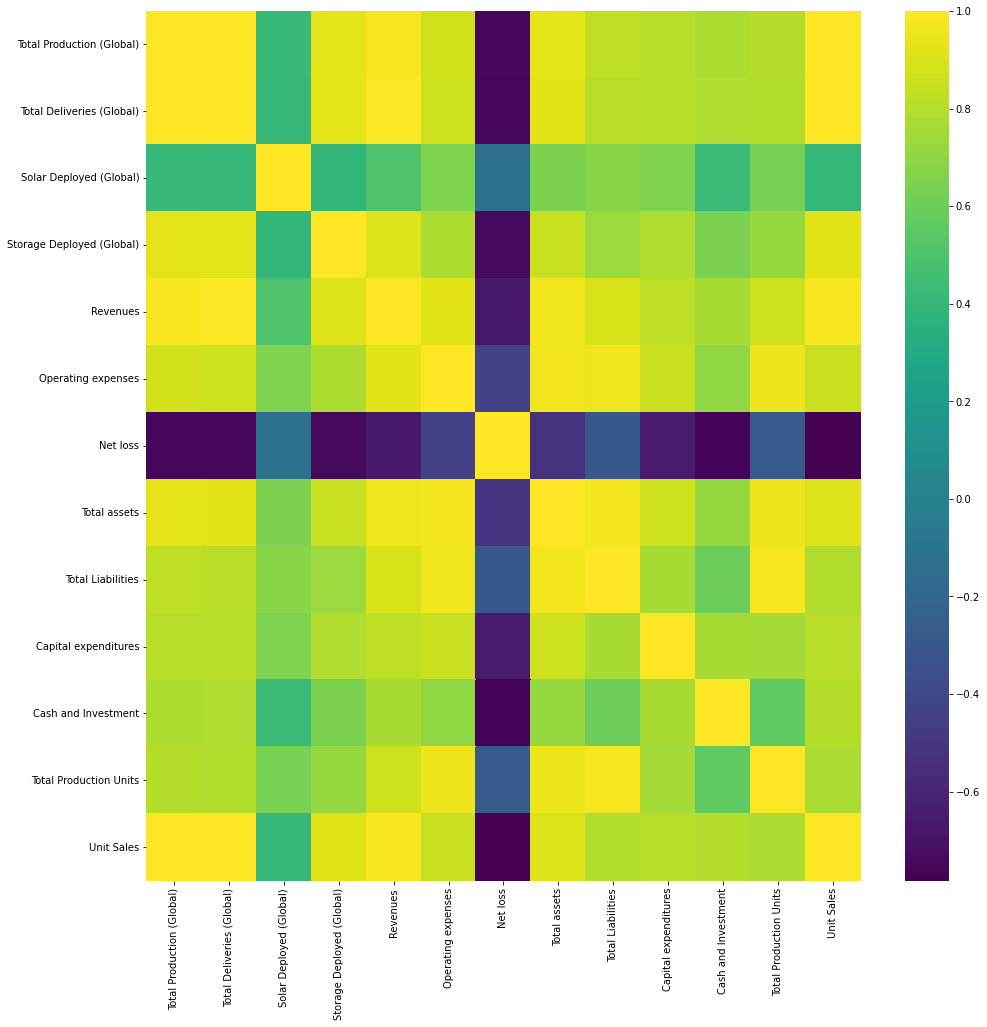

In [ ]:
#changing negative values of features to positive
df_tesla_prod["Capital expenditures"]=-df_tesla_prod["Capital expenditures"]
df_tesla_prod["Net loss"]=-df_tesla_prod["Net loss"]

#plotting the correlation matrix
fig = plt.figure(figsize= (16,16))
sns.heatmap(df_tesla_prod.corr(), annot=False, vmax=1, cmap='viridis', square=False)

<b> Observations: </b>
1. The Capital Expenditure is correlated to all the financial features. 
2. Solar Deployed has no correlation with other features, we can drop it.
3. Net Loss has no correlation with any feature.
4. Cash and Investment show partial correlation.
5. Total assets is directly correlated with the revenues and liabilities.
6. Unit sales seems related to the revenues, but not very highly correlated with the capital expenditures.
7. We are assuming that the cash and investment (which are short term investments) will stay constant.

We cannot conclude on the features to drop just yet. We will go ahead and drop the unwanted features while doing the regression.

In [ ]:
#selecting the dependent and independent variables
y=df_tesla_prod["Capital expenditures"]
df_tesla_prod.drop(columns="Capital expenditures",inplace=True)
X=df_tesla_prod.copy()

#standardize the data
features_tesla=["Total Production (Global)","Total Deliveries (Global)",
                "Solar Deployed (Global)","Storage Deployed (Global)",
                "Revenues","Operating expenses","Total Production Units","Unit Sales",
                "Net loss","Total assets","Total Liabilities","Cash and Investment"]

df_fitted=pd.DataFrame(df_tesla_prod[features_tesla])
minmax=MinMaxScaler()
X[features_tesla]=minmax.fit_transform(df_fitted)

#train-test-split
x_train,x_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#doing basic regression and getting its statistical output
results=sm.OLS(y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Capital expenditures   R-squared (uncentered):                   0.957
Model:                              OLS   Adj. R-squared (uncentered):              0.941
Method:                   Least Squares   F-statistic:                              57.74
Date:                  Tue, 07 Dec 2021   Prob (F-statistic):                    8.97e-18
Time:                          18:48:16   Log-Likelihood:                         -566.26
No. Observations:                    43   AIC:                                      1157.
Df Residuals:                        31   BIC:                                      1178.
Df Model:                            12                                                  
Covariance Type:              nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Total Production (Global) -1.308e+06   1.41e+06     -0.928      0.361   -4.18e+06    1.57e+06
Total Deliveries (Global) -4.323e+06   3.01e+06     -1.438      0.160   -1.05e+07    1.81e+06
Solar Deployed (Global)    6.067e+04   1.97e+05      0.309      0.760    -3.4e+05    4.61e+05
Storage Deployed (Global)  4.264e+05   3.36e+05      1.269      0.214   -2.59e+05    1.11e+06
Revenues                   2.579e+05   1.53e+06      0.169      0.867   -2.85e+06    3.37e+06
Operating expenses         8.856e+05   4.36e+05      2.031      0.051   -3539.980    1.77e+06
Net loss                   9.139e+04      5e+04      1.827      0.077   -1.06e+04    1.93e+05
Total assets               4.029e+06   1.17e+06      3.439      0.002    1.64e+06    6.42e+06
Total Liabilities         -2.173e+06   7.51e+05     -2.893      0.007    -3.7e+06   -6.41e+05
Cash and Investment        2.709e+05   2.31e+05      1.172      0.250      -2e+05    7.42e+05
Total Production Units    -5.918e+04   3.45e+05     -0.172      0.865   -7.62e+05    6.43e+05
Unit Sales                 3.564e+06    2.3e+06      1.552      0.131   -1.12e+06    8.25e+06
==============================================================================
Omnibus:                        2.666   Durbin-Watson:                   1.722
Prob(Omnibus):                  0.264   Jarque-Bera (JB):                1.639
Skew:                           0.416   Prob(JB):                        0.441
Kurtosis:                       3.473   Cond. No.                         221.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We have taken a significance level of 10%. From above, we can view the parameters associated with an Ordinary Linear Regression model. We have the coefficients, the P-values etc. In accordance to our significance level, we are dropping every feature that has a p-value above ~0.1.

Parameters under consideration: Total Deliveries, Operating Expense, Net Loss, Total Assets, Total liabilities, Unit Sales.

In [ ]:
X=X[["Operating expenses","Total assets","Total Liabilities","Unit Sales","Net loss"]]

#train-test-split
x_train,x_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42)

Model=["Lasso Regression","Ridge Regression","ElasticNetCV","Random Forest Regressor","Gradient Boosting Regressor"]
Scores=[]

In [ ]:
#apply linear regression models- Lasso
gs_params={'alpha':(0.0001,0.001,0.01,0.1,1,10,100,1000)}
gsl = GridSearchCV(Lasso(), param_grid=gs_params, scoring="r2", cv=5)
gsl.fit(x_train, y_train)
gsl.best_params_
print(gsl.best_estimator_.coef_)

Scores.append(gsl.score(x_test, y_test))

# Print information about the grid search
print(f"Using {gsl.n_splits_} splits, {type(gsl.best_estimator_)} got a best validation score of {gsl.best_score_:4f} +- {gsl.cv_results_['std_test_score'][gsl.best_index_]}, with the parameters {gsl.best_params_}.")

[  523069.17530238  1700527.31905793       -0.         -2128391.79493234
 -1741490.25315872]
Using 5 splits, <class 'sklearn.linear_model._coordinate_descent.Lasso'> got a best validation score of 0.588238 +- 0.4033121691371535, with the parameters {'alpha': 100}.


In [ ]:
#ridge regression
gs_params={'alpha':(0.0001,0.001,0.01,0.1,1,10,100,1000)}
gsr = GridSearchCV(Ridge(), param_grid=gs_params, scoring="r2", cv=5)
gsr.fit(x_train, y_train)
gsr.best_params_

Scores.append(gsr.score(x_test, y_test))

# Print information about the grid search
print(f"Using {gsr.n_splits_} splits, {type(gsr.best_estimator_)} got a best validation score of {gsr.best_score_:4f} +- {gsr.cv_results_['std_test_score'][gsr.best_index_]}, with the parameters {gsr.best_params_}.")

Using 5 splits, <class 'sklearn.linear_model._ridge.Ridge'> got a best validation score of 0.588071 +- 0.4117284955592678, with the parameters {'alpha': 0.01}.


In [ ]:
#Elastic Net CV Regression model
gs_params={'alpha':(0.0001,0.001,0.01,0.1,1,10,100,1000),'l1_ratio': np.arange(0, 1, 0.1)}
gsen = GridSearchCV(ElasticNet(random_state=0), param_grid=gs_params, scoring="r2", cv=5)
gsen.fit(x_train, y_train)
gsen.best_params_

Scores.append(gsen.score(x_test, y_test))

# Print information about the grid search
print(f"Using {gsen.n_splits_} splits, {type(gsen.best_estimator_)} got a best validation score of {gsen.best_score_:4f} +- {gsen.cv_results_['std_test_score'][gsen.best_index_]}, with the parameters {gsen.best_params_}.")


Using 5 splits, <class 'sklearn.linear_model._coordinate_descent.ElasticNet'> got a best validation score of 0.594247 +- 0.40081399908252807, with the parameters {'alpha': 0.001, 'l1_ratio': 0.8}.


In [ ]:
#Random Forest Regressor Model
gs_params = {'n_estimators': np.arange(50, 250, 25),'max_depth': list(np.arange(2, 8, 1)) + [None],}
gsrf = GridSearchCV(RandomForestRegressor(random_state=0), gs_params, cv=5)
gsrf.fit(x_train, y_train)
gsrf.best_params_

Scores.append(gsrf.score(x_test, y_test))

# Print information about the grid search
print(f"Using {gsrf.n_splits_} splits, {type(gsrf.best_estimator_)} got a best validation score of {gsrf.best_score_:4f} +- {gsrf.cv_results_['std_test_score'][gsrf.best_index_]}, with the parameters {gsrf.best_params_}.")

Using 5 splits, <class 'sklearn.ensemble._forest.RandomForestRegressor'> got a best validation score of 0.690204 +- 0.08260811530556379, with the parameters {'max_depth': 5, 'n_estimators': 50}.


In [ ]:
#Gradient Boosting Regression Model
gs_params = {'n_estimators': np.arange(50, 500, 50),
             'learning_rate': np.logspace(-2, 0, 5),
             'max_depth': [3],
             'n_iter_no_change': [50]}
gsgb = GridSearchCV(GradientBoostingRegressor(random_state=0), gs_params, cv=5)
gsgb.fit(x_train, y_train)
gsgb.best_params_

Scores.append(gsgb.score(x_test, y_test))

# Print information about the grid search
print(f"Using {gsgb.n_splits_} splits, {type(gsgb.best_estimator_)} got a best validation score of {gsgb.best_score_:4f} +- {gsgb.cv_results_['std_test_score'][gsgb.best_index_]}, with the parameters {gsgb.best_params_}.")

Using 5 splits, <class 'sklearn.ensemble._gb.GradientBoostingRegressor'> got a best validation score of 0.675989 +- 0.18344645501265502, with the parameters {'learning_rate': 0.31622776601683794, 'max_depth': 3, 'n_estimators': 300, 'n_iter_no_change': 50}.


In [ ]:
#getting an output of the scores
df_scores=pd.DataFrame({"Model":Model,
                       "Scores":Scores})
df_scores.head()

,Model,Scores
0,Lasso Regression,0.918584
1,Ridge Regression,0.913942
2,ElasticNetCV,0.916252
3,Random Forest Regressor,0.583399
4,Gradient Boosting Regressor,0.590822


Based on our estimates, the Lasso Regression gave us the best model with an accuracy score of 0.91. This model looks appropriate to us fom all aspects of study, and thus we will use this prediction model for our future decisions.

<b> Results </b>

Asssumptions:
1. We have an ambitious project of increasing the sales by 5% of what it was last quarter. We significantly want to increase it by 2% after that.
2. We assume that the total liabilities and assets remain the same initially.
3. The operating expense we will increase by a few percent.
4. Assuming that the Net Loss is the same as for the last quarter. 

<b> (A) Prediction A: Keeping a fixed sales goal,  Net Loss, Liabilities and Assets as well as incresing Operating Expenses by 5 %, how the Capital Expenditure numbers are influented? </b>

[1477042.44203229 1535161.23928811 1593280.03654393 1651398.83379975
 1709517.63105557 1767636.42831139 1825755.22556721 1883874.02282304
 1941992.82007886 2000111.61733468]


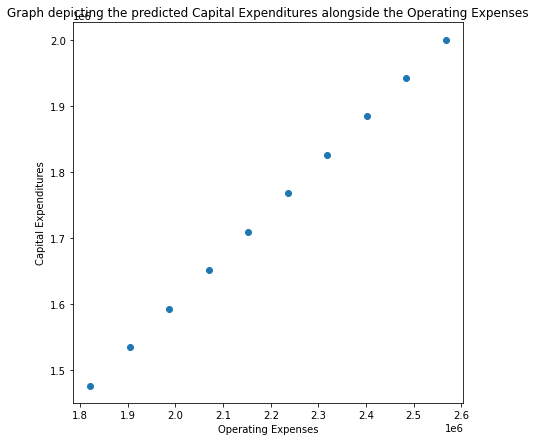

In [ ]:
#adding new values for prediction
X_new=df_tesla_prod[["Operating expenses","Total assets","Total Liabilities","Unit Sales", "Net loss"]]

#dictionary of new values
Sales=[237431.0*1.05,237431.0*1.05,237431.0*1.05,237431.0*1.05,237431.0*1.05,237431.0*1.05,237431.0*1.05,237431.0*1.05,237431.0*1.05,237431.0*1.05]
Liability=[29340000.0,29340000.0,29340000.0,29340000.0,29340000.0,29340000.0,29340000.0,29340000.0,29340000.0,29340000.0]
Assets=[5.783400e+07,5.783400e+07,5.783400e+07,5.783400e+07,5.783400e+07,5.783400e+07,5.783400e+07,5.783400e+07,5.783400e+07,5.783400e+07]
OE_new=[1.656000e+06*(1.10),1.656000e+06*(1.15),1.656000e+06*(1.20),1.656000e+06*(1.25),1.656000e+06*(1.30),1.656000e+06*(1.35),1.656000e+06*(1.40),1.656000e+06*(1.45),1.656000e+06*(1.50),1.656000e+06*(1.55)]
Net_loss=[89873.0,89873.0, 89873.0, 89873.0, 89873.0, 89873.0, 89873.0, 89873.0, 89873.0, 89873.0]

#data frame of new values
X_new_df=pd.DataFrame({"Operating expenses":OE_new,
                       "Total assets":Assets,
                       "Total Liabilities":Liability,
                       "Unit Sales":Sales,
                      "Net Loss": Net_loss})

features=["Operating expenses","Total assets","Total Liabilities","Unit Sales","Net Loss"]
minmax=MinMaxScaler()
X_new_df[features]=minmax.fit_transform(X_new_df[features])

y_pred_a=gsl.predict(X_new_df)
print(y_pred_a)

X_new_df[features]=minmax.inverse_transform(X_new_df[features])

plt.figure(figsize=(7,7))
plt.scatter(X_new_df["Operating expenses"],y_pred_a)
plt.xlabel("Operating Expenses")
plt.ylabel("Capital Expenditures")
plt.title("Graph depicting the predicted Capital Expenditures alongside the Operating Expenses")
plt.show()

<b> Observation: </b>
Looking at the graph above we see that our predictions are distributed linearly. As Capital Expenditures and Operating Expenses have high positive correlation, increase in one component's value, is infulencing others increase.

<b> (B) Prediction B: Keeping a fixed Liabilities and Assets, Net Loss values and increasing Sales by 1% as well as Operating Expenses by 2%, how Capital Expenditure is influenced? </b>

[1477042.44203229 1298673.26207341 1120304.08211452  941934.90215564
  763565.72219675  585196.54223786  406827.36227898  228458.1823201
   50089.00236122 -128280.17759767]


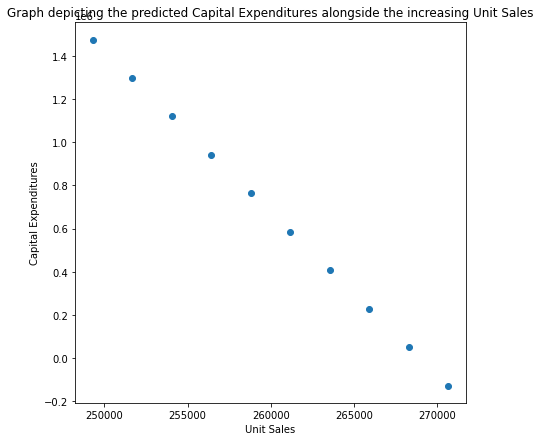

In [ ]:
#getting new values
X_new=df_tesla_prod[["Operating expenses","Total assets","Total Liabilities","Unit Sales", "Net loss"]]

Sales=[237431.0*1.05,237431.0*1.06,237431.0*1.07,237431.0*1.08,237431.0*1.09,237431.0*1.1,237431.0*1.11,237431.0*1.12,237431.0*1.13,237431.0*1.14]
Liability=[29340000.0,29340000,29340000.0,29340000.0,29340000.0,29340000.0,29340000.0,29340000.0,29340000.0,29340000.0]
Assets=[5.783400e+07,5.783400e+07,5.783400e+07,5.783400e+07,5.783400e+07,5.783400e+07,5.783400e+07,5.783400e+07,5.783400e+07,5.783400e+07]
OE_new=[1.656000e+06*1.05,1.656000e+06*1.07,1.656000e+06*1.09,1.656000e+06*1.11,1.656000e+06*1.13,1.656000e+06*1.15,1.656000e+06*1.17,1.656000e+06*1.19,1.656000e+06*1.21,1.656000e+06*1.23]
Net_loss=[89873.0,89873.0, 89873.0, 89873.0, 89873.0,89873.0, 89873.0, 89873.0, 89873.0,89873.0]

X_new_df=pd.DataFrame({"Operating expenses":OE_new,
                       "Total assets":Assets,
                       "Total Liabilities":Liability,
                       "Unit Sales":Sales,
                      "Net Loss":Net_loss})

features=["Operating expenses","Total assets","Total Liabilities","Unit Sales", "Net Loss"]
minmax=MinMaxScaler()
X_new_df[features]=minmax.fit_transform(X_new_df[features])

y_pred_a=gsl.predict(X_new_df)
print(y_pred_a)

X_new_df[features]=minmax.inverse_transform(X_new_df[features])

plt.figure(figsize=(7,7))
plt.scatter(X_new_df["Unit Sales"],y_pred_a)
plt.xlabel("Unit Sales")
plt.ylabel("Capital Expenditures")
plt.title("Graph depicting the predicted Capital Expenditures alongside the increasing Unit Sales")
plt.show()

<b> Observations and Conclusion </b>

Looking at the graph above we observe that Tesla's Capital Expenditure is decreasing while Unit sales are increasing by 1%. At a sale margin of almost 13% increase from the last quarter value, keeping the other factors constant, the value of the capital expenditures goes down to negative. A plausible explanation of this comes from the fact that as sales increase, the revenue generated increases too as a result, which would decrease the capital expenditure (coming out of Tesla's pockets). Eventually, it goes under good profit under ideal market conditions. Thus, our advice to the CFO would be to aim at a 13% increase in his/her company Electric Vehicle sales for better profit margins. 

As seen from the correlation analysis, using the climate change statistics for marketing Tesla Electric Vehicles is a good approach as share prices of Tesla seem highly correlated to this aspect.

<b> Acknowledgement </b>

We would like to thank the University of Zurich and our faculty from Deloitte for giving us the opportunity for working on this project. We would especially like to thank our mentor Vladimir Popov for being patient and helpful to us throughout and making us reach our goal. 

<b> References and Bibliography </b>
1. https://www.statista.com/topics/2086/tesla/#dossierKeyfigures
2. https://carsalesbase.com/volkswagen-group-us/
3. https://ir.tesla.com/#tab-quarterly-disclosure
4. https://climatecommunication.yale.edu/visualizations-data/ycom-us/
5. https://www.kaggle.com/mruanova/us-gasoline-and-diesel-retail-prices-19952021
6. https://carsalesbase.com/europe-tesla/
7. https://towardsdatascience.com/predicting-sales-611cb5a252de
8. https://en.wikipedia.org/wiki/List_of_Tesla_factories
9. https://ourworldindata.org/grapher/gdp-per-capita-worldbank?country=~CHE
10. https://data.oecd.org/energy/crude-oil-import-prices.htm